In [1]:
from Bio import SeqIO
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
aav_ref_seq_file = "../../data/FLIP/aav/P03135.fasta"
aav_full_data_file = "../../data/FLIP/aav/full_data.csv"
aav_split_data_mut_des_file = "../../data/FLIP/aav/splits/mut_des.csv"
aav_split_data_des_mut_file = "../../data/FLIP/aav/splits/des_mut.csv"
aav_split_data_one_vs_many_file = "../../data/FLIP/aav/splits/one_vs_many.csv"
aav_split_data_two_vs_many_file = "../../data/FLIP/aav/splits/two_vs_many.csv"
aav_split_data_seven_vs_many_file = "../../data/FLIP/aav/splits/seven_vs_many.csv"
aav_split_data_low_vs_high_file = "../../data/FLIP/aav/splits/low_vs_high.csv"
aav_split_data_sampled_file = "../../data/FLIP/aav/splits/sampled.csv"
aav_region = (561,588)

# Get the reference sequence
aav_reference_seq = str(next(SeqIO.parse(aav_ref_seq_file, "fasta")).seq)

### Full data

In [3]:
df_aav_full_data = pd.read_csv(aav_full_data_file)
print(df_aav_full_data.info())
df_aav_full_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284002 entries, 0 to 284001
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   mutation_mask                   284002 non-null  object 
 1   mutated_region                  284001 non-null  object 
 2   category                        284001 non-null  object 
 3   number_of_mutations             284001 non-null  float64
 4   levenshtein_distance            284001 non-null  float64
 5   binary_score                    284001 non-null  object 
 6   overarching_partition           284001 non-null  object 
 7   score                           284001 non-null  float64
 8   full_aa_sequence                284001 non-null  object 
 9   sampled_split                   82575 non-null   object 
 10  sampled_split_validation        6607 non-null    object 
 11  one_vs_many_split               82575 non-null   object 
 12  one_vs_many_spli

,mutation_mask,mutated_region,category,number_of_mutations,levenshtein_distance,binary_score,overarching_partition,score,full_aa_sequence,sampled_split,...,two_vs_many_split_validation,seven_vs_many_split,seven_vs_many_split_validation,low_vs_high_split,low_vs_high_split_validation,mut_des_split,mut_des_split_validation,des_mut_split,des_mut_split_validation,reference_region
0,*____________________________,*DEEEIRTTNPVATEQYGSVSTNLQRGNR,stop,1.0,1.0,False,natural_partitions,-6.824780,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,train,...,NaN,train,NaN,train,NaN,train,NaN,test,NaN,DEEEIRTTNPVATEQYGSVSTNLQRGNR
1,*___________________________,*EEEIRTTNPVATEQYGSVSTNLQRGNR,stop,1.0,1.0,False,natural_partitions,-6.500402,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,train,...,NaN,train,NaN,train,NaN,train,NaN,test,NaN,DEEEIRTTNPVATEQYGSVSTNLQRGNR
2,AA___A_____________cAaNmGEeApDaQaEgGd,AAEEIATTNPVATEQYGSVcAaNmGEeApDaQaEgGd,cnn_designed_plus_rand_train_walked,21.0,19.0,True,design_partitions,0.900998,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,NaN,...,NaN,NaN,NaN,NaN,NaN,test,NaN,train,NaN,DEEEIRTTNPVATEQYGSVSTNLQRGNR
3,AA___A______tYA_W_CnTAgNnG_TtAeTg_lDs,AAEEIATTNPVAtYAQWGCnTAgNnGLTtAeTgNlDs,cnn_designed_plus_rand_train_walked,24.0,23.0,False,design_partitions,-4.843517,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,NaN,...,NaN,NaN,NaN,NaN,NaN,test,NaN,train,NaN,DEEEIRTTNPVATEQYGSVSTNLQRGNR
4,AA___F____E_L__VwA_C_eRnPfQhLGsPEI,AAEEIFTTNPEALEQVwASCSeRnPfQhLGsPEI,lr_rand_doubles_plus_single_walked,22.0,20.0,False,design_partitions,-6.566587,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,NaN,...,NaN,NaN,NaN,NaN,NaN,test,NaN,train,NaN,DEEEIRTTNPVATEQYGSVSTNLQRGNR


In [4]:
for split in ['mut_des', 'des_mut', 'one_vs_many', 'two_vs_many', 'seven_vs_many', 'low_vs_high', 'sampled']:
    num_val = df_aav_full_data[split + '_split_validation'].sum()
    num_train = df_aav_full_data[split + '_split'].value_counts()['train'] - num_val
    num_test = df_aav_full_data[split + '_split'].value_counts()['test']
    num_all = num_train + num_val + num_test
    print(split, num_all, num_train, num_val, num_test)

mut_des 284001 74316 8259 201426
des_mut 284001 181283 20143 82575
one_vs_many 82575 1049 117 81409
two_vs_many 82575 28623 3180 50772
seven_vs_many 82575 62993 7001 12581
low_vs_high 82575 42785 4753 35037
sampled 82575 59453 6607 16515


<Axes: >

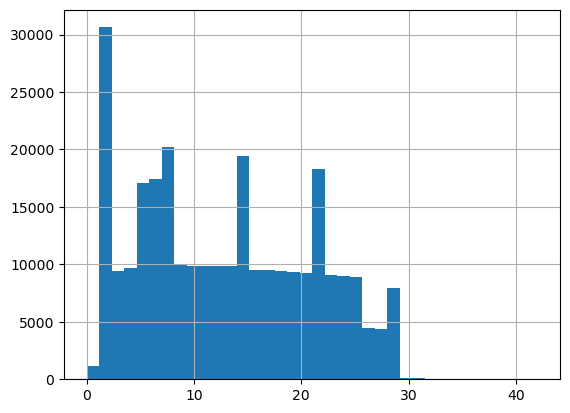

In [5]:
df_aav_full_data['number_of_mutations'].hist(bins=36)

In [6]:
df_aav_full_data[df_aav_full_data['full_aa_sequence'] == aav_reference_seq]

,mutation_mask,mutated_region,category,number_of_mutations,levenshtein_distance,binary_score,overarching_partition,score,full_aa_sequence,sampled_split,...,two_vs_many_split_validation,seven_vs_many_split,seven_vs_many_split_validation,low_vs_high_split,low_vs_high_split_validation,mut_des_split,mut_des_split_validation,des_mut_split,des_mut_split_validation,reference_region
0,*____________________________,*DEEEIRTTNPVATEQYGSVSTNLQRGNR,stop,1.0,1.0,False,natural_partitions,-6.824780,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,train,...,NaN,train,NaN,train,NaN,train,NaN,test,NaN,DEEEIRTTNPVATEQYGSVSTNLQRGNR
22819,_*___________________________,D*EEEIRTTNPVATEQYGSVSTNLQRGNR,stop,1.0,1.0,False,natural_partitions,-4.375918,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,train,...,NaN,train,NaN,train,NaN,train,NaN,test,NaN,DEEEIRTTNPVATEQYGSVSTNLQRGNR
28513,__*__________________________,DE*EEIRTTNPVATEQYGSVSTNLQRGNR,stop,1.0,1.0,False,natural_partitions,-4.450755,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,train,...,NaN,train,NaN,train,NaN,train,NaN,test,NaN,DEEEIRTTNPVATEQYGSVSTNLQRGNR
42350,___*_________________________,DEE*EIRTTNPVATEQYGSVSTNLQRGNR,stop,1.0,1.0,False,natural_partitions,-7.087815,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,train,...,NaN,train,NaN,train,True,train,NaN,test,NaN,DEEEIRTTNPVATEQYGSVSTNLQRGNR
44239,____*________________________,DEEE*IRTTNPVATEQYGSVSTNLQRGNR,stop,1.0,1.0,False,natural_partitions,-5.199868,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,train,...,NaN,train,NaN,train,NaN,train,NaN,test,NaN,DEEEIRTTNPVATEQYGSVSTNLQRGNR
44705,_____*_______________________,DEEEI*RTTNPVATEQYGSVSTNLQRGNR,stop,1.0,1.0,False,natural_partitions,-5.366674,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,train,...,NaN,train,NaN,train,NaN,train,NaN,test,NaN,DEEEIRTTNPVATEQYGSVSTNLQRGNR
53385,______*______________________,DEEEIR*TTNPVATEQYGSVSTNLQRGNR,stop,1.0,1.0,False,natural_partitions,-4.618746,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,test,...,NaN,train,NaN,train,NaN,train,True,test,NaN,DEEEIRTTNPVATEQYGSVSTNLQRGNR
57741,_______*_____________________,DEEEIRT*TNPVATEQYGSVSTNLQRGNR,stop,1.0,1.0,False,natural_partitions,-7.098384,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,train,...,True,train,NaN,train,NaN,train,NaN,test,NaN,DEEEIRTTNPVATEQYGSVSTNLQRGNR
58530,________*____________________,DEEEIRTT*NPVATEQYGSVSTNLQRGNR,stop,1.0,1.0,False,natural_partitions,-7.317262,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,test,...,NaN,train,NaN,train,NaN,train,True,test,NaN,DEEEIRTTNPVATEQYGSVSTNLQRGNR
58984,_________*___________________,DEEEIRTTN*PVATEQYGSVSTNLQRGNR,stop,1.0,1.0,False,natural_partitions,-3.964386,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,train,...,NaN,train,NaN,train,True,train,NaN,test,NaN,DEEEIRTTNPVATEQYGSVSTNLQRGNR


In [7]:
df_aav_full_data[df_aav_full_data['category'] == "stop"]['full_aa_sequence'].apply(len)

0        735
1        734
22819    735
22820    734
28513    735
28514    734
42350    735
42351    734
44239    735
44240    734
44705    735
44706    734
53384    734
53385    735
57740    734
57741    735
58530    735
58531    734
58984    735
58985    734
59632    734
59633    735
64471    735
64472    734
64473    734
64474    735
65397    735
65398    734
65752    735
65753    734
70404    734
70405    735
71744    735
71745    734
71880    735
71881    734
80515    734
80516    735
82625    735
82626    734
87365    734
87366    735
89855    734
89856    735
92400    735
92401    734
93173    735
93174    734
93969    734
93970    735
94702    735
94703    734
94762    735
94763    734
94852    734
94853    735
94878    735
Name: full_aa_sequence, dtype: int64

### mut-des

In [8]:
df_aav_split_data_mut_des = pd.read_csv(aav_split_data_mut_des_file)
print(df_aav_split_data_mut_des.info())
df_aav_split_data_mut_des.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284009 entries, 0 to 284008
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   sequence    284009 non-null  object 
 1   target      284009 non-null  float64
 2   set         284009 non-null  object 
 3   validation  8259 non-null    object 
dtypes: float64(1), object(3)
memory usage: 8.7+ MB
None


,sequence,target,set,validation
0,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.824780,train,NaN
1,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.500402,train,NaN
2,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,0.900998,test,NaN
3,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-4.843517,test,NaN
4,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.566587,test,NaN


In [9]:
num_val = df_aav_split_data_mut_des['validation'].sum()
num_train = df_aav_split_data_mut_des.set.value_counts()['train'] - num_val
num_test = df_aav_split_data_mut_des.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('mut-des', num_all, num_train, num_val, num_test)

mut-des 284009 74324 8259 201426


### des-mut

In [10]:
df_aav_split_data_des_mut = pd.read_csv(aav_split_data_des_mut_file)
print(df_aav_split_data_des_mut.info())
df_aav_split_data_des_mut.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284009 entries, 0 to 284008
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   sequence    284009 non-null  object 
 1   target      284009 non-null  float64
 2   set         284009 non-null  object 
 3   validation  20143 non-null   object 
dtypes: float64(1), object(3)
memory usage: 8.7+ MB
None


,sequence,target,set,validation
0,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.824780,test,NaN
1,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.500402,test,NaN
2,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,0.900998,train,NaN
3,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-4.843517,train,NaN
4,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.566587,train,NaN


In [11]:
num_val = df_aav_split_data_des_mut['validation'].sum()
num_train = df_aav_split_data_des_mut.set.value_counts()['train'] - num_val
num_test = df_aav_split_data_des_mut.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('des-mut', num_all, num_train, num_val, num_test)

des-mut 284009 181283 20143 82583


### one-vs-many

In [12]:
df_aav_split_data_one_vs_many = pd.read_csv(aav_split_data_one_vs_many_file)
print(df_aav_split_data_one_vs_many.info())
df_aav_split_data_one_vs_many.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284009 entries, 0 to 284008
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   sequence    284009 non-null  object 
 1   target      284009 non-null  float64
 2   set         82583 non-null   object 
 3   validation  117 non-null     object 
dtypes: float64(1), object(3)
memory usage: 8.7+ MB
None


,sequence,target,set,validation
0,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.824780,train,NaN
1,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.500402,train,NaN
2,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,0.900998,NaN,NaN
3,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-4.843517,NaN,NaN
4,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.566587,NaN,NaN


In [13]:
num_val = df_aav_split_data_one_vs_many['validation'].sum()
num_train = df_aav_split_data_one_vs_many.set.value_counts()['train'] - num_val
num_test = df_aav_split_data_one_vs_many.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('one-many', num_all, num_train, num_val, num_test)

one-many 82583 1053 117 81413


### two-many

In [14]:
df_aav_split_data_two_vs_many = pd.read_csv(aav_split_data_two_vs_many_file)
print(df_aav_split_data_two_vs_many.info())
df_aav_split_data_two_vs_many.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284009 entries, 0 to 284008
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   sequence    284009 non-null  object 
 1   target      284009 non-null  float64
 2   set         82583 non-null   object 
 3   validation  3181 non-null    object 
dtypes: float64(1), object(3)
memory usage: 8.7+ MB
None


,sequence,target,set,validation
0,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.824780,train,NaN
1,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.500402,train,NaN
2,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,0.900998,NaN,NaN
3,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-4.843517,NaN,NaN
4,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.566587,NaN,NaN


In [15]:
num_val = df_aav_split_data_two_vs_many['validation'].sum()
num_train = df_aav_split_data_two_vs_many.set.value_counts()['train'] - num_val
num_test = df_aav_split_data_two_vs_many.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('two-many', num_all, num_train, num_val, num_test)

two-many 82583 28626 3181 50776


### seven-vs-many

In [16]:
df_aav_split_data_seven_vs_many = pd.read_csv(aav_split_data_seven_vs_many_file)
print(df_aav_split_data_seven_vs_many.info())
df_aav_split_data_seven_vs_many.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284009 entries, 0 to 284008
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   sequence    284009 non-null  object 
 1   target      284009 non-null  float64
 2   set         82583 non-null   object 
 3   validation  7001 non-null    object 
dtypes: float64(1), object(3)
memory usage: 8.7+ MB
None


,sequence,target,set,validation
0,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.824780,train,NaN
1,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.500402,train,NaN
2,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,0.900998,NaN,NaN
3,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-4.843517,NaN,NaN
4,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.566587,NaN,NaN


In [17]:
num_val = df_aav_split_data_seven_vs_many['validation'].sum()
num_train = df_aav_split_data_seven_vs_many.set.value_counts()['train'] - num_val
num_test = df_aav_split_data_seven_vs_many.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('seven-many', num_all, num_train, num_val, num_test)

seven-many 82583 63001 7001 12581


### low-vs-high

In [18]:
df_aav_split_data_low_vs_high = pd.read_csv(aav_split_data_low_vs_high_file)
print(df_aav_split_data_low_vs_high.info())
df_aav_split_data_low_vs_high.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284009 entries, 0 to 284008
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   sequence    284009 non-null  object 
 1   target      284009 non-null  float64
 2   set         82583 non-null   object 
 3   validation  4755 non-null    object 
dtypes: float64(1), object(3)
memory usage: 8.7+ MB
None


,sequence,target,set,validation
0,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.824780,train,NaN
1,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.500402,train,NaN
2,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,0.900998,NaN,NaN
3,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-4.843517,NaN,NaN
4,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.566587,NaN,NaN


In [19]:
num_val = df_aav_split_data_low_vs_high['validation'].sum()
num_train = df_aav_split_data_low_vs_high.set.value_counts()['train'] - num_val
num_test = df_aav_split_data_low_vs_high.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('low-high', num_all, num_train, num_val, num_test)

low-high 82583 42791 4755 35037


### sampled

In [20]:
df_aav_split_data_sampled = pd.read_csv(aav_split_data_sampled_file)
print(df_aav_split_data_sampled.info())
df_aav_split_data_sampled.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284009 entries, 0 to 284008
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   sequence    284009 non-null  object 
 1   target      284009 non-null  float64
 2   set         82583 non-null   object 
 3   validation  6607 non-null    object 
dtypes: float64(1), object(3)
memory usage: 8.7+ MB
None


,sequence,target,set,validation
0,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.824780,train,NaN
1,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.500402,train,NaN
2,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,0.900998,NaN,NaN
3,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-4.843517,NaN,NaN
4,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,-6.566587,NaN,NaN


In [21]:
num_val = df_aav_split_data_sampled['validation'].sum()
num_train = df_aav_split_data_sampled.set.value_counts()['train'] - num_val
num_test = df_aav_split_data_sampled.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('sampled', num_all, num_train, num_val, num_test)

sampled 82583 59459 6607 16517
